# MA Strategy with Position Resizing Based on Volatility
Volatility as measured throught the ATR

In [2]:
# auto reload
%load_ext autoreload
%autoreload 2

# Imports
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import core_metrics, file_exports, strategies

In [3]:
from strategies import ma_position_resize

In [4]:
# running the strategy
# constants
investment_amount = 10000
test_data = pd.read_csv("../data/processed/training_data_70.csv")
short_ma = 20
long_ma = 50
atr_quantile = .75
result = ma_position_resize(investment_amount, test_data, short_ma, long_ma, atr_quantile, transaction_costs=0.001, slippage=0.0005)

In [5]:
result.tail()

,Open,High,Low,Close,Volume,MA_short,MA_long,TR,ATR,ATR_pct,...,position,trade_cost,market_ret,strategy_ret,strategy_ret_net,market_ret_net,cumulative_market,cumulative_strategy,portfolio_value,market_portfolio_value
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-01,374.407243,378.114230,371.691310,377.771179,78740100,395.322696,381.919351,6.422920,6.352458,0.016816,...,0.0,0.0,0.003138,0.002836,0.002836,0.003138,2.214502,1.632774,16327.737480,22145.024005
2022-09-02,381.449500,382.669283,371.967569,373.787720,99632100,394.311128,382.189609,10.701714,6.932358,0.018546,...,0.0,0.0,-0.010545,-0.009530,-0.009530,-0.010545,2.191151,1.617214,16172.138608,21911.512793
2022-09-06,374.635883,375.579301,370.147465,372.377380,76637400,393.251915,382.202568,5.431836,6.732289,0.018079,...,0.0,0.0,-0.003773,-0.003410,-0.003410,-0.003773,2.182884,1.611699,16116.992496,21828.838411
2022-09-07,372.062901,379.839031,371.843739,379.067139,70964200,392.605333,382.377722,7.995292,6.900689,0.018204,...,0.0,0.0,0.017965,0.016236,0.016236,0.017965,2.222099,1.637867,16378.666145,22220.993415
2022-09-08,376.789646,382.002292,375.579372,381.544891,80821700,391.670963,382.753760,6.422920,6.836987,0.017919,...,0.0,0.0,0.006536,0.005907,0.005907,0.006536,2.236624,1.647542,16475.420206,22366.239785


In [6]:
# export as csv in the data file
csv_name = "ma_position_resizing.csv"
output_folder = "../data/strategy_results/"

from file_exports import export_file
export_file(csv_name, output_folder, result)

Exported data as file ../data/strategy_results/ma_position_resizing.csv successfully.


In [7]:
# prelim test on final strategy portfolio value given varying threshold levels
thresholds = [.50, .55, .6, .65, .7, .75, .8]
for t in thresholds:
    res = ma_position_resize(investment_amount, test_data, short_ma, long_ma, t, transaction_costs=0.001, slippage=0.0005)
    print(f"ATR Quantile cutoff = {t}, final value = {res['portfolio_value'].iloc[-1]}")

ATR Quantile cutoff = 0.5, final value = 14810.456521033244
ATR Quantile cutoff = 0.55, final value = 15082.910121757302
ATR Quantile cutoff = 0.6, final value = 15472.40184741319
ATR Quantile cutoff = 0.65, final value = 15791.046755102287
ATR Quantile cutoff = 0.7, final value = 16077.656721481053
ATR Quantile cutoff = 0.75, final value = 16475.420205960098
ATR Quantile cutoff = 0.8, final value = 16591.068419930056


## Core Performance Metrics
To evaluate the basline strategy, we will perform the following tests.


### 1. Profit & Loss Metrics
Let's examine the returns and P&L of the strategy and market portfolios, considering transaction cost and slippage amounts as defined above.

Final portfolio value: 16475.420205960098 on 2022-09-08 00:00:00
Strategy returned 64.75420205960098% from 2015-01-02 00:00:00 to 2022-09-08 00:00:00
Market returned 123.66239785226219 from 2015-01-02 00:00:00 to 2022-09-08 00:00:00

Annualized across 7.6824 years: 
MA Strategy with Trend Detection returned 6.7149% per year
Buy & Hold the market returned 11.0467% per year


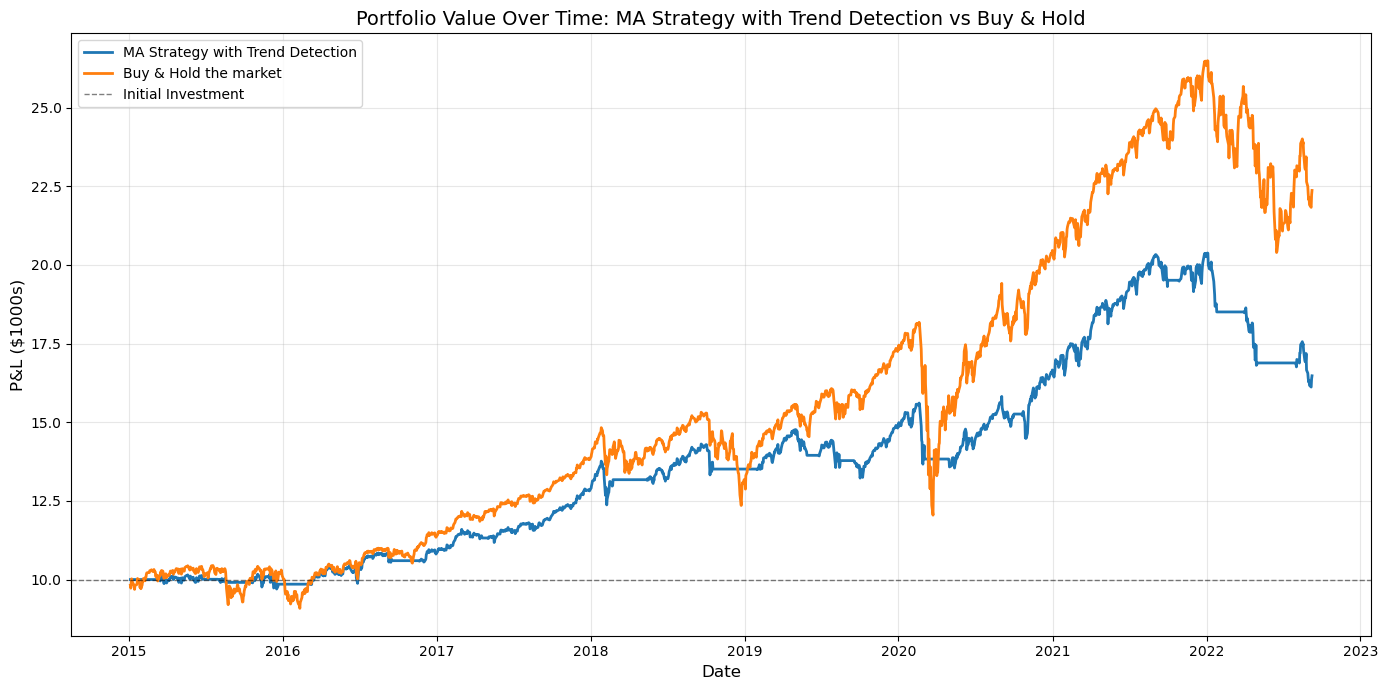

In [8]:
from core_metrics import pnl

graph_title = 'Portfolio Value Over Time: MA Strategy with Trend Detection vs Buy & Hold'
strategy_name = "MA Strategy with Trend Detection"
benchmark_name = "Buy & Hold the market"

result, strategy_annual_return, market_annual_return = pnl(result, investment_amount, strategy_name, benchmark_name, graph_title)

### 2. Performance Ratios

In [9]:
from core_metrics import performance_ratios

perf_ratios = performance_ratios(result)

print("WITHOUT transaction costs...")
print(f"Sharpe Ratio: {perf_ratios['sharpe ratio']}")
print(f"Information Ratio: {perf_ratios['information ratio']}")
print(f"Sortino Ratio: {perf_ratios['sortino ratio']} \n")

print("WITH transaction costs...")
print(f"Sharpe Ratio: {perf_ratios['sharpe with costs']}")
print(f"Information Ratios: {perf_ratios['information ratio with costs']}")
print(f"Sortino Ratio: {perf_ratios['sortino ratio with costs']}")


WITHOUT transaction costs...
Sharpe Ratio: 0.5122185213457239
Information Ratio: 9.415410341090539
Sortino Ratio: 8.518742232835626 

WITH transaction costs...
Sharpe Ratio: 0.44294875800141864
Information Ratios: 9.408870594531795
Sortino Ratio: 7.357440820164686


In [10]:
from core_metrics import risk_metrics

risks = risk_metrics(result)
print(f"Max Drawdown: {(100 * risks['max_drawdown']):.2f}%")
print(f"Average Drawdown: {(100 * risks['avg_drawdown']):.2f}%")
print(f"Max Drawdown Duration: {(risks['max_dd_duration']):.2f} days")
print(f"Average Drawdown Duration: {(risks['avg_dd_duration']):.2f} days")
print(f"Volatility: {(100 * risks['volatility']):.2f}%")

Max Drawdown: -20.91%
Average Drawdown: -3.45%
Max Drawdown Duration: 171.00 days
Average Drawdown Duration: 14.40 days
Volatility: 10.63%


### 4. Trade Statistics

In [11]:
from core_metrics import trade_statistics

trade_stats = trade_statistics(result)
print(f"Total Number of Trades: {(result['position'] != 0).sum()}")
print(f"Average Holding Periods: {trade_stats['avg_holding_period']}")
print(f"Win Rate: {trade_stats['win_rate']}")
print(f"Win-Loss Ratio: {trade_stats['win_loss_ratio']}")
print(f"Profit Factor (gross profit/gross loss): {trade_stats['profit_factor']}")


Total Number of Trades: 36
Average Holding Periods: 113.05882352941177
Win Rate: 0.6470588235294118
Win-Loss Ratio: inf
Profit Factor (gross profit/gross loss): 5.459702925397624


### 5. Strategy Beta to Benchmark

In [12]:
from core_metrics import find_alpha, calmar_ratio, find_beta

beta = find_beta(result, result.index[0], result.index[-1])
print(f'Beta: {beta}')
alpha = find_alpha(result, strategy_annual_return, market_annual_return)
print(f'Alpha: {alpha}')
calmar = calmar_ratio(strategy_annual_return, risks['max_drawdown'])
print(f'Calmar Ratio: {calmar:.2f}')

Beta: 0.3537600775497704
Alpha: 0.015099378265180333
Calmar Ratio: 0.32


### 5. Consistency of Returns

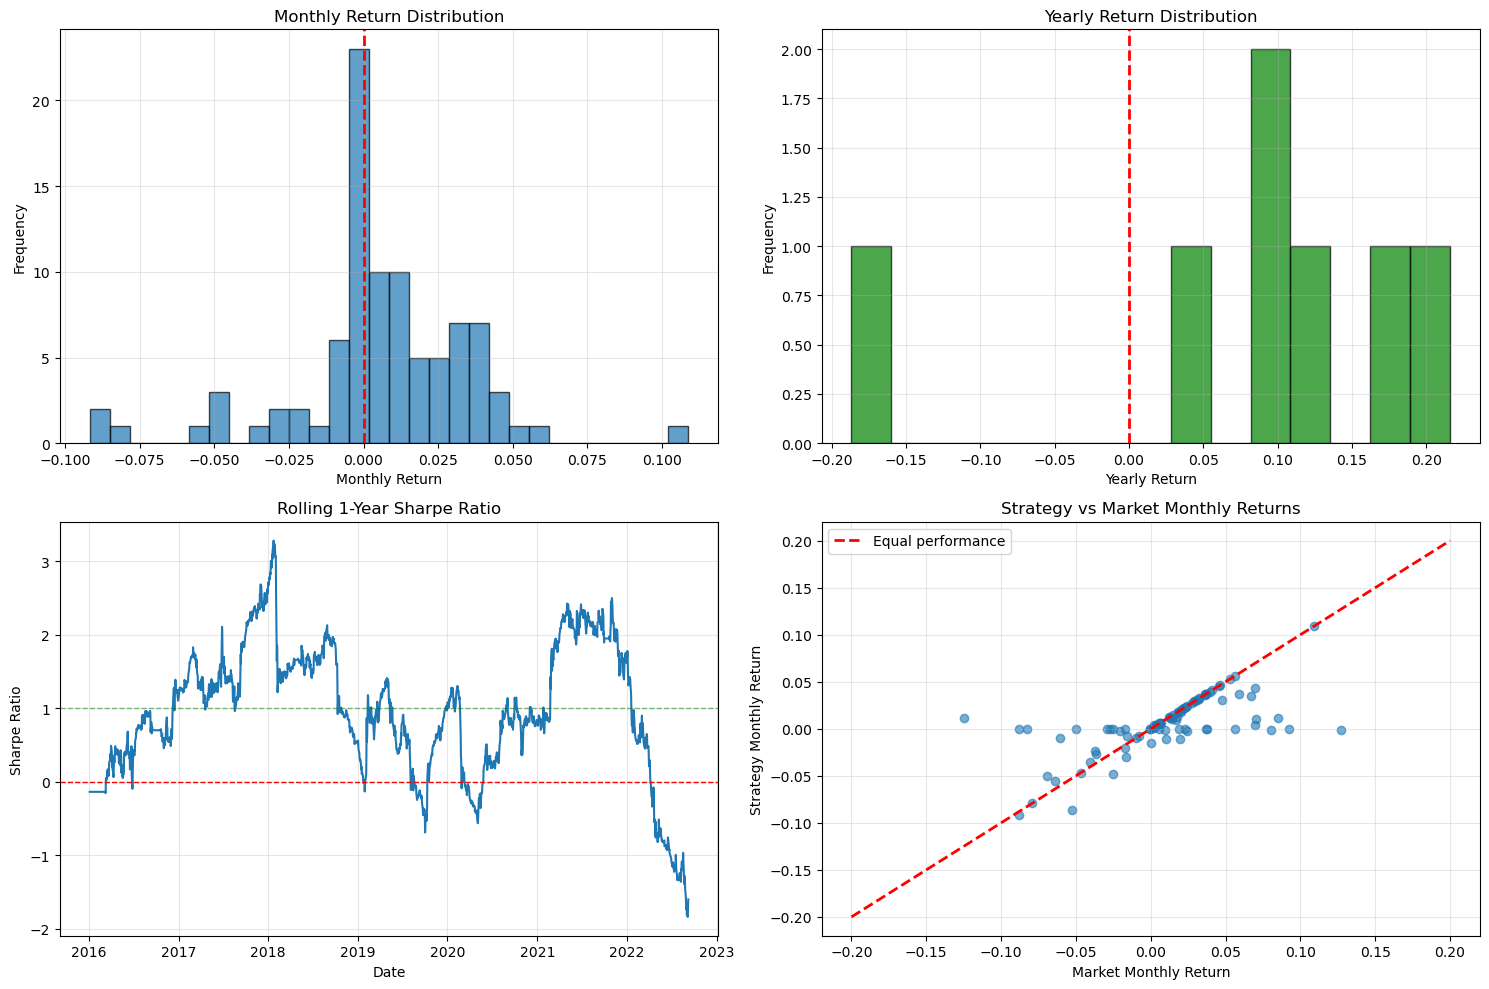

Percentage of Positive Months: 55.91%
Average Monthly Return: 0.59%
Median Monthly Return: 0.38%
Standard Deviation of Monthly Returns: 2.98%
Percentage of Positive Years: 75.00%
Average Yearly Return: 8.39%
Median Yearly Return: 9.90%


In [13]:
from core_metrics import consistency

window = 252 # trading days (for rolling sharpe)
consistency = consistency(result, window)

print(f"Percentage of Positive Months: {consistency['pct_positive_months']:.2%}")
print(f"Average Monthly Return: {consistency['avg_monthly_return']:.2%}")
print(f"Median Monthly Return: {consistency['median_monthly_return']:.2%}")
print(f"Standard Deviation of Monthly Returns: {consistency['std_monthly_return']:.2%}")

print(f"Percentage of Positive Years: {consistency['pct_positive_years']:.2%}")
print(f"Average Yearly Return: {consistency['avg_yearly_return']:.2%}")
print(f"Median Yearly Return: {consistency['median_yearly_return']:.2%}")


### 6. Sensitivity of Returns to Transaction Costs

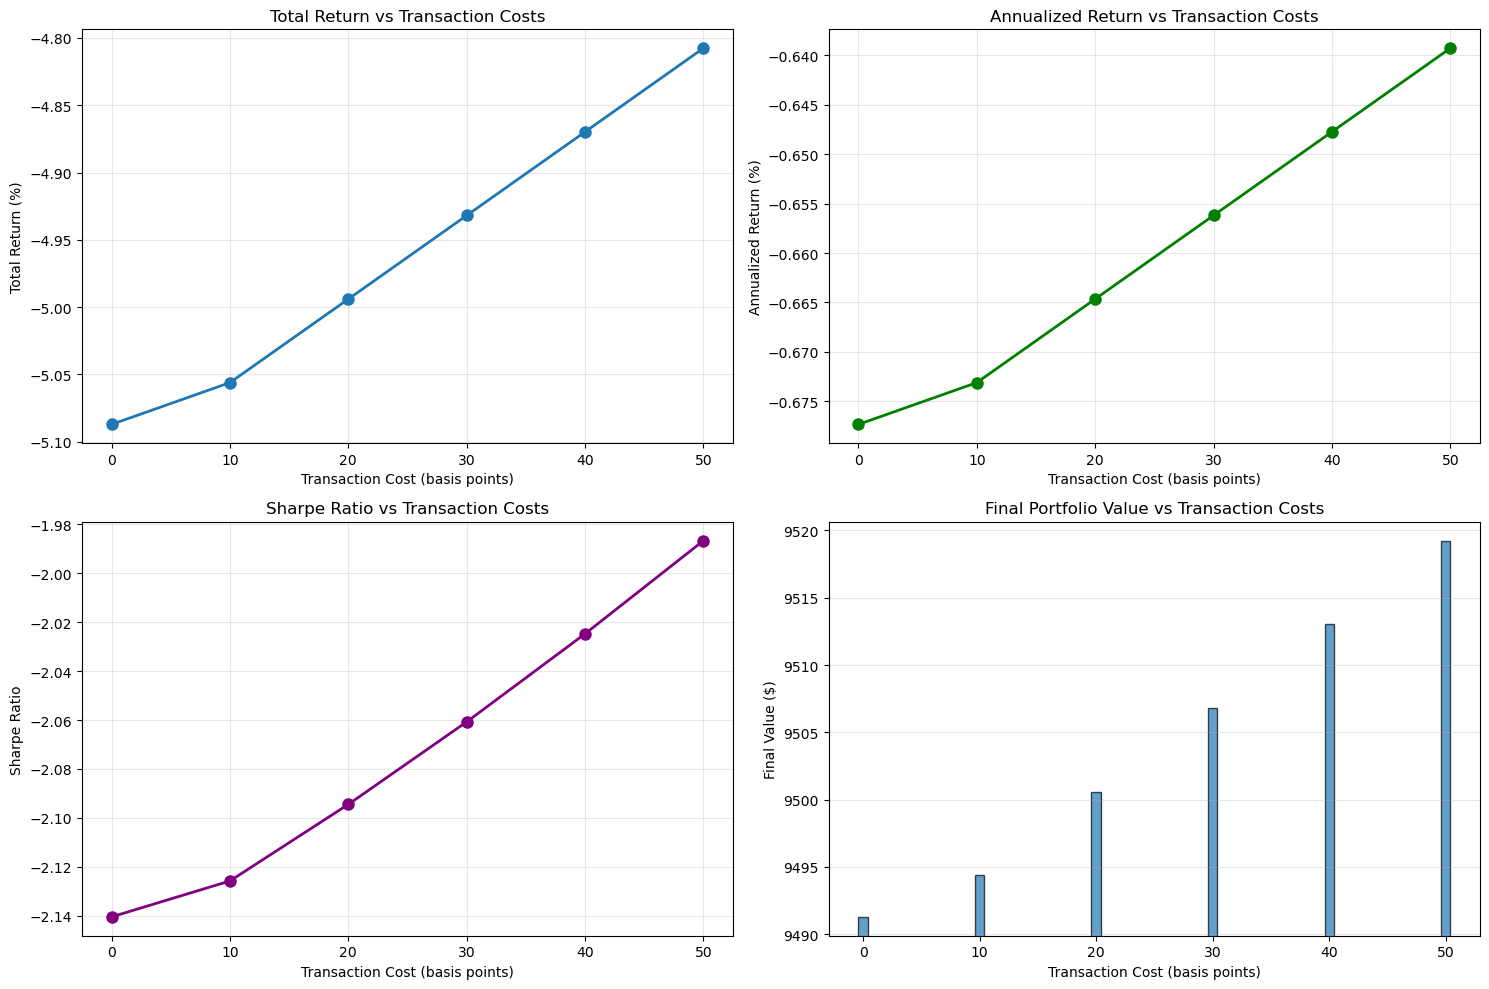

Transaction Cost Sensitivity Analysis
 cost_bps  cost_pct  total_return  annualized_return  sharpe_ratio  final_value
      0.0       0.0     -0.050873          -0.006773     -2.140531  9491.273276
     10.0       0.1     -0.050562          -0.006731     -2.125832  9494.378102
     20.0       0.2     -0.049941          -0.006646     -2.094509  9500.590101
     30.0       0.3     -0.049319          -0.006562     -2.060747  9506.805231
     40.0       0.4     -0.048698          -0.006477     -2.024720  9513.023492
     50.0       0.5     -0.048076          -0.006393     -1.986627  9519.244886


Strategy remains profitable at all tested cost levels


In [14]:
from core_metrics import sensitivity

prices_data = pd.read_csv("../data/processed/training_data_70.csv")

def ma_volatility_filter_helper(investment_amount, test_data, short_ma, long_ma, transaction_costs=0.001, slippage=0.0005):
    res = ma_position_resize(investment_amount, test_data, short_ma, long_ma, .75, transaction_costs, slippage)
    return res
df = sensitivity(ma_volatility_filter_helper, investment_amount, prices_data, short_ma, long_ma)